In [4]:
import pandas as pd

In [5]:
df_data = pd.read_csv('../../data_KEGG186/LUNG_CellBlind_Filtered_ZScore_pivot.csv', index_col=0)
df_data.head()

,LCLC.NCIH1299,LCLC.NCIH1915,LUAD.EKVX,LUAD.NCIH1693,LUAD.NCIH1793,LUAD.NCIH2405,LUSC.HCC15,LUSC.NCIH520,SCLC.LU135,SCLC.NCIH146,SCLC.NCIH1963,SCLC.NCIH526
drug,,,,,,,,,,,,
5-Fluorouracil,-0.203856,0.207840,0.700472,0.536842,-0.158315,0.594146,-0.572870,-0.226874,-0.235852,0.481146,0.226450,-0.456176
ABT737,0.382419,0.519234,0.439596,0.374888,0.526277,0.703894,0.556010,0.356616,-1.484032,-1.525583,-0.782434,-1.067349
AGI-5198,-0.045910,0.243406,0.368384,-0.187304,0.439428,0.788242,-0.055290,0.027384,-0.166193,0.004862,-0.228614,-0.619671
AGI-6780,-0.517769,-0.278163,0.240662,0.078672,0.123713,0.978246,-0.008523,-0.383903,-0.457582,-0.014800,-0.034755,-0.314648
AGK2,-0.266444,0.075164,0.264318,-0.020661,0.104664,0.683762,-0.081920,-0.276051,-0.290339,0.016328,-0.014696,-0.216219


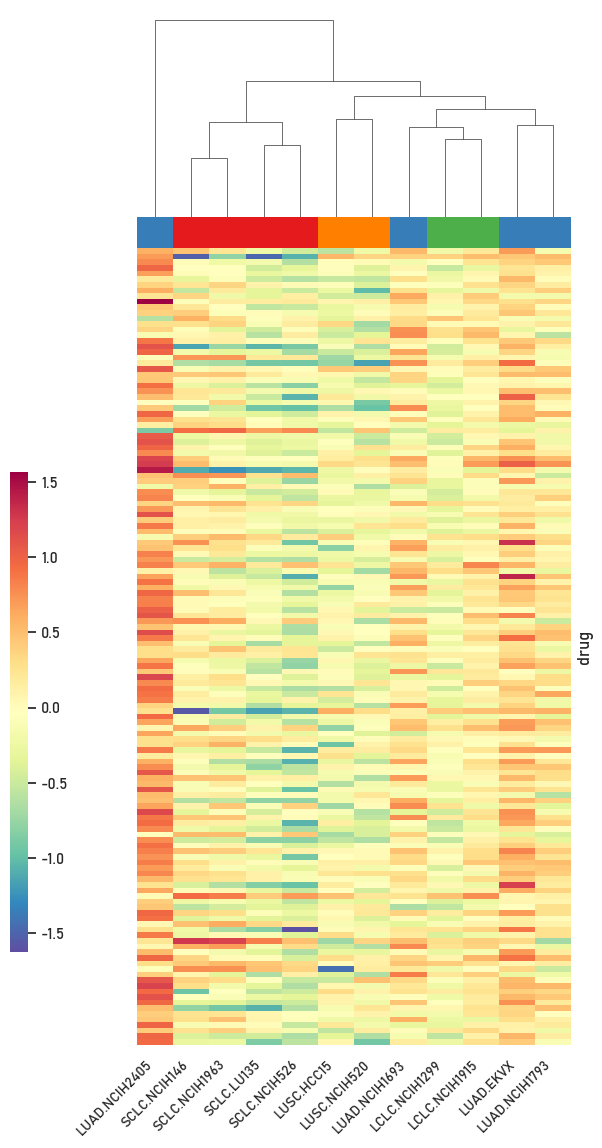

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# palette = {'LUAD':'#377EB8',
#            'LCLC':'#4DAF4A',
#            # 'NSCLC':'#ff9f9b',
#            'LUSC':'#FF7F00',
#            'SCLC':'#E41A1C'}
palette = {
    'LCLC.NCIH1299':'#4DAF4A',
    'LCLC.NCIH1915':'#4DAF4A',
    'LUAD.EKVX':'#377EB8',
    'LUAD.NCIH1693':'#377EB8',
    'LUAD.NCIH1793':'#377EB8',
    'LUAD.NCIH2405':'#377EB8',
    'LUSC.HCC15':'#FF7F00',
    'LUSC.NCIH520':'#FF7F00',
    'SCLC.LU135':'#E41A1C',
    'SCLC.NCIH146':'#E41A1C',
    'SCLC.NCIH1963':'#E41A1C',
    'SCLC.NCIH526':'#E41A1C'}
# 创建一个新的列颜色列表，根据你的数据的列名来指定颜色
col_colors = [palette.get(col) for col in df_data.columns]
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
sns.set(color_codes=True)
# iris = sns.load_dataset("iris")
# species = iris.pop("species")
# heatmap_data = pd.read_csv('heatmap_data.csv')
cell_line_names = df_data.columns
heatmap_data = df_data.iloc[:,0:]
#设置图片大小
g= sns.clustermap(heatmap_data,row_cluster=False,col_cluster=True, metric='euclidean',
                  fmt="d",cmap='Spectral_r',figsize=(6,12),
                  # dendrogram_ratio=(.1, .2),
                    cbar_pos=(0, .2, .03, .4)
                  , yticklabels=False, col_colors=col_colors)

ax = g.ax_heatmap
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='left',size=14)
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=45, horizontalalignment='right',size=10)
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False

#设置图片名称，分辨率，并保存
plt.savefig('cluster.png',dpi = 300)
plt.show()